# Load Imports and Data

In [1]:
!pip install pingouin
from model.model import *
from model.plotting import *
from preprocess import *
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

/Users/jordanlei/Documents/GitHub/neuromatch-project/preprocess.py:443: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if (by is not '') & (plot == 'histogram') :
/Users/jordanlei/Documents/GitHub/neuromatch-project/preprocess.py:462: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if fig is not '':
/Users/jordanlei/Documents/GitHub/neuromatch-project/preprocess.py:467: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if by is not '':
/Users/jordanlei/Documents/GitHub/neuromatch-project/preprocess.py:473: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if sub is not '':
/Users/jordanlei/Documents/GitHub/neuromatch-project/preprocess.py:480: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if center is not '':
/Users/jordanlei/Documents/GitHub/neuromatch-project/preprocess.py:487: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if fig_val is not '':
/Users/jordanlei/Documents/GitHub/neuromatch-project/preproces

In [2]:
download()
alldat = load()
print("Data Loaded. Proceeding to Preprocessing...")
session = 12

Loading data. Patience, padawan ...
Data Loaded. Proceeding to Preprocessing...


# Preprocess Data
Preprocess data using the preprocessing function and split into train and test sets. Verbosity sets whether or not to print out at the end

In [3]:
dfs = preprocess(alldat, verbose = True)
train, test = train_test_split(dfs)

[float64]   	session             	session number, indexed 0 - 38
[object]   	session_type        	session type, train / test
[object]   	mouse_name          	name of the mouse
[float64]   	trial_number        	trial number, indexed 0 to num_trials
[bool]   	go_trial            	true if go_trial, false if no-go trial
[float64]   	gocue               	time of go cue, in ms
[float64]   	response_time       	time of response, in ms
[float64]   	latency             	response time - go cue, in ms
[float64]   	mouse_resp          	mouse response for a given trial
[object]   	wheel_velocity      	velocity of the wheel
[object]   	wheel_acceleration  	acceleration of the wheel (first derivative of velocity)
[float64]   	feedback_onset      	feedback onset (reward or punishment)
[float64]   	feedback_type       	-1 if punish, 0 if none, 1 if reward
[float64]   	contrast_left       	left contrast
[float64]   	contrast_right      	right contrast
[float64]   	contrast_diff       	contrast left - co

In [4]:
train.head()

,session,session_type,mouse_name,trial_number,go_trial,gocue,response_time,latency,mouse_resp,wheel_velocity,...,fut_acc,fut_latency,fut_difficulty,zeros,gocue_vel_trial,gocue_acc_trial,stim_vel_trial,stim_acc_trial,rt_vel_trial,rt_acc_trial
0,0.0,train,Cori,0.0,True,1027.216250,1150.203633,122.987383,1.0,"[-1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",...,1.0,525.089054,0.5,0,"[18.0, 17.0, 15.0, 13.0]","[-1.0, -2.0, -2.0, -3.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[10.0, 11.0, 11.0, 13.0]","[1.0, 0.0, 2.0, 0.0]"
1,0.0,train,Cori,1.0,True,874.413814,1399.502868,525.089054,-1.0,"[0.0, -1.0, 0.0, -1.0, 0.0, 1.0, 0.0, 1.0, 1.0...",...,1.0,124.078016,0.5,0,"[-6.0, -5.0, -4.0, -4.0]","[1.0, 1.0, 0.0, 1.0]","[0.0, -1.0, 0.0, -1.0]","[-1.0, 1.0, -1.0, 1.0]","[-7.0, -7.0, -6.0, -5.0]","[0.0, 1.0, 1.0, 0.0]"
2,0.0,train,Cori,2.0,True,825.213029,949.291045,124.078016,1.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0...",...,1.0,1505.189657,1.0,0,"[6.0, 6.0, 8.0, 9.0]","[0.0, 2.0, 1.0, 2.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[9.0, 7.0, 6.0, 6.0]","[-2.0, -1.0, 0.0, -2.0]"
3,0.0,train,Cori,3.0,False,761.612015,2266.801672,1505.189657,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",...,0.0,154.765410,0.5,0,"[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, -1.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]",[],[]
4,0.0,train,Cori,4.0,True,662.010427,816.775837,154.765410,1.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0,...",...,0.0,330.288154,1.0,0,"[13.0, 14.0, 14.0, 14.0]","[1.0, 0.0, 0.0, -2.0]","[0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0]","[2.0, 2.0, 2.0, 2.0]","[0.0, 0.0, 0.0, 1.0]"


# Plot Histograms
Plot, like, everything. But not everything. Just some things.


In [5]:
import seaborn as sns
sns.set()
def histograms(df, x, by: str = '', fig:str = '', sub:str = '', filter_:dict = None, title = None):
    
    # Pull out all unique figure distinctions 
    if fig is not '':
        fig_list = sorted(set(df[fig]))
    else:
        fig_list = ['']
        
    # Pull out all unique subfigure distinctions 
    if sub is not '':
        sub_list = sorted(set(df[sub]))
    else:
        sub_list = ['']
        
    if by is not '':
        by_list = sorted(set(df[by]))
    else:
        by_list = ['']
    
    
    df.head()
    if filter_ is not None: 
        for key in filter_.keys(): 
            df = df[df[key] == filter_[key]]
            
    df.head()
            
    for fig_i,fig_val in enumerate(fig_list):
        plt.figure(fig_i,figsize=(20,10));
        if fig_val is not '':
            df_fig = df[df[fig] == fig_val]
        else:
            df_fig = df
        for sub_i,sub_val in enumerate(sub_list):
            plt.subplot(np.ceil(np.sqrt(len(sub_list))), np.ceil(np.sqrt(len(sub_list))), sub_i+1)
            if sub_val is not '':
                df_sub = df_fig[df_fig[sub] == sub_val]
            else:
                df_sub = df_fig
            for by_i,by_val in enumerate(by_list):
                if by_val is not '':
                    df_by = df_sub[df_sub[by] == by_val]
                else:
                    df_by = df_sub
                try:
                    bins = 30;#int(np.round(np.ptp(df_by[x].to_numpy())/20))
                except: 
                    bins = 1

                if bins is not 0:
                    plt.hist(x = x, data = df_by, alpha = 0.5, label = "%s: %s"%(by, by_val),bins=bins)
                    plt.xlabel(x)
                    plt.legend()
                    plt.title(str(sub) + ' = ' + str(sub_val))
        plt.tight_layout()
        plt.suptitle(str(fig_val) + ' ' + str(x),fontweight='bold', fontsize=16)
        plt.subplots_adjust(top=0.90)
        plt.show()

<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:32: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:38: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:6: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:12: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:17: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:32: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:38: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:43: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:52: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-5-74f9bbc10940>:6: SyntaxWarning: "is not" with a literal. Did 

In [6]:
train['lat_chg'] = train['latency'].diff()

<ipython-input-6-1f7fb4275432>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['lat_chg'] = train['latency'].diff()


In [7]:
train['mode'] = 0
train['mode'][train['latency']<200] = 1
train_2 = (train['latency']>=200).to_numpy() & (train['latency']<400).to_numpy()
train['mode'][train_2] = 2

<ipython-input-7-7fcc4639e3da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mode'] = 0
<ipython-input-7-7fcc4639e3da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['mode'][train['latency']<200] = 1
/Users/jordanlei/anaconda3/envs/dlenv/lib/python3.8/site-packages/pandas/core/generic.py:8765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(ne

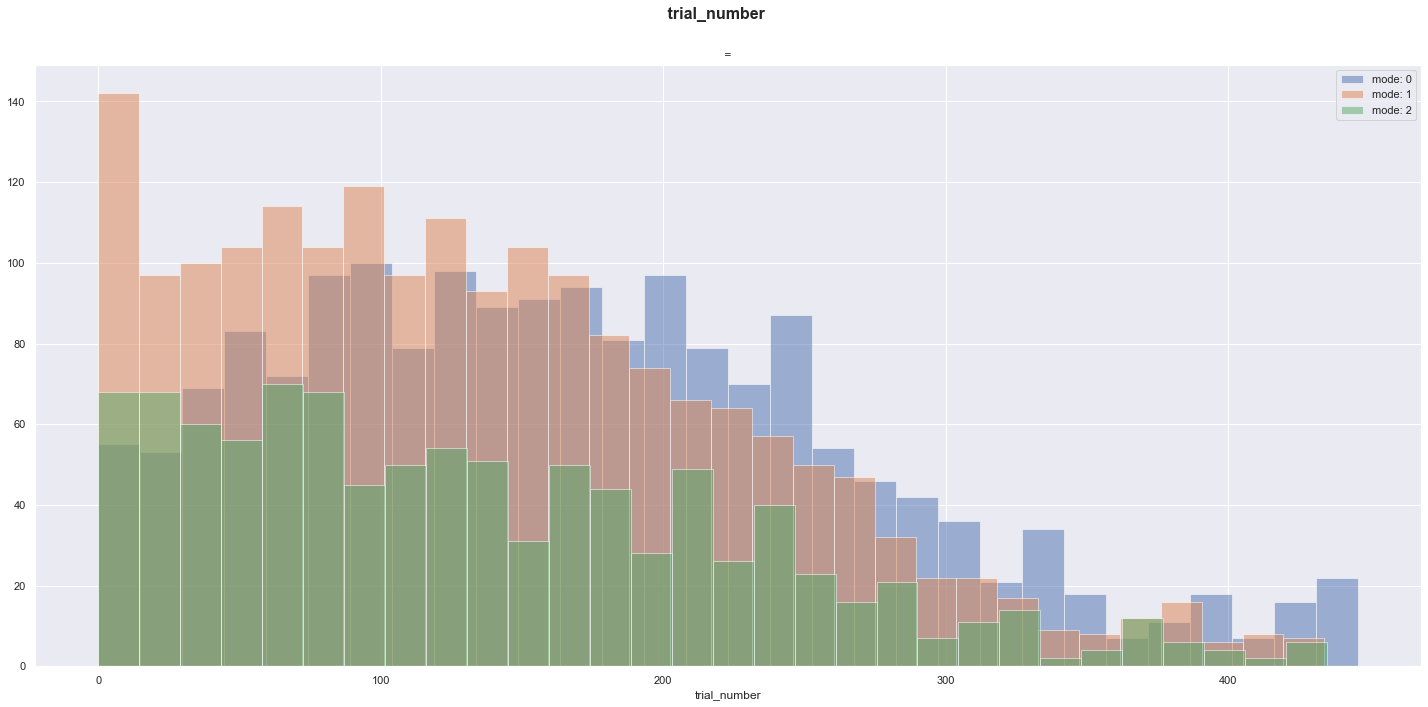

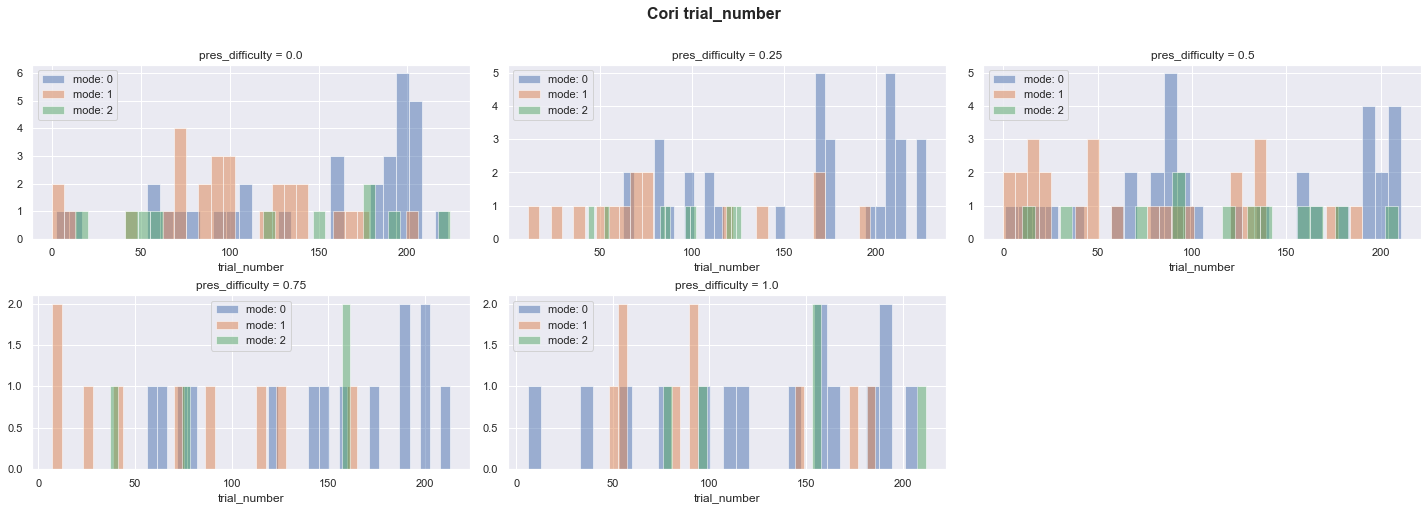

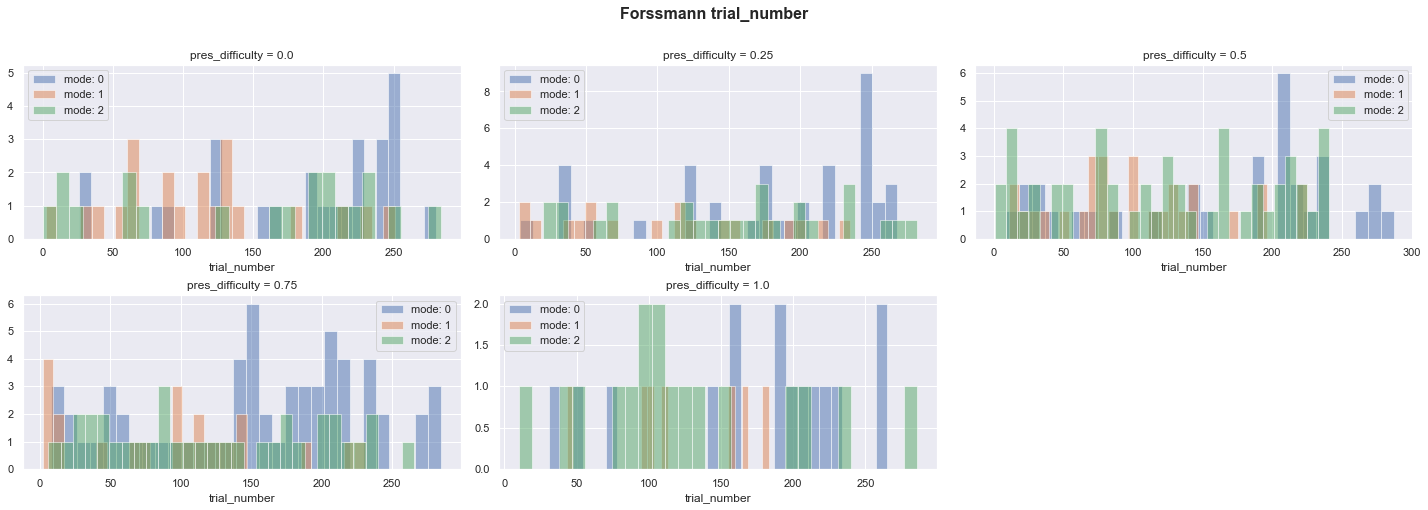

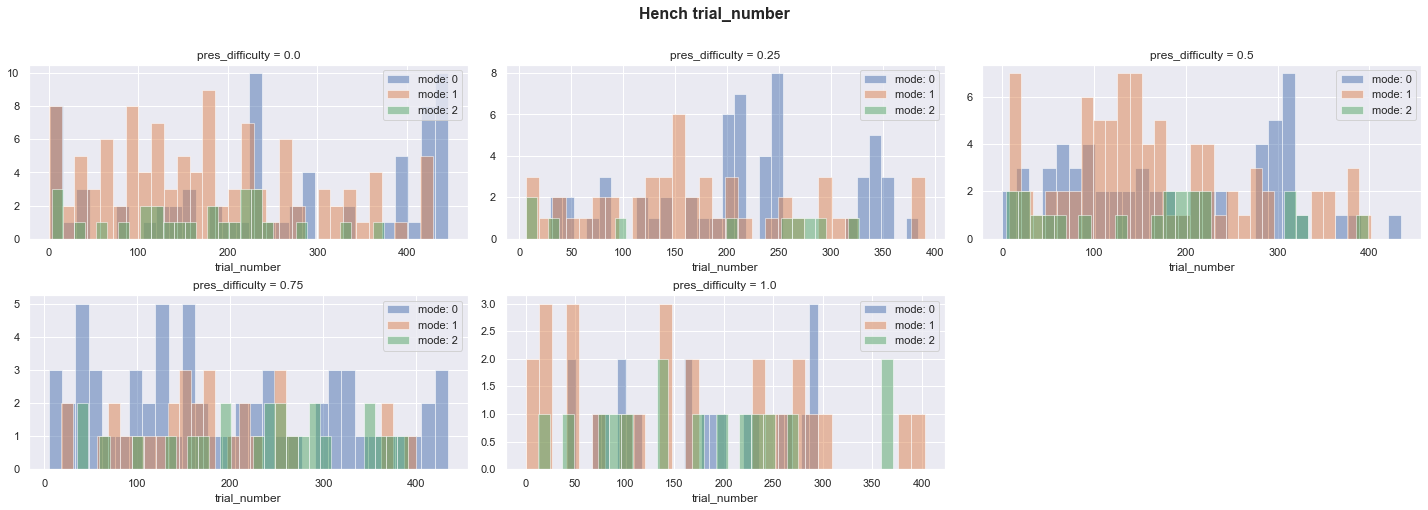

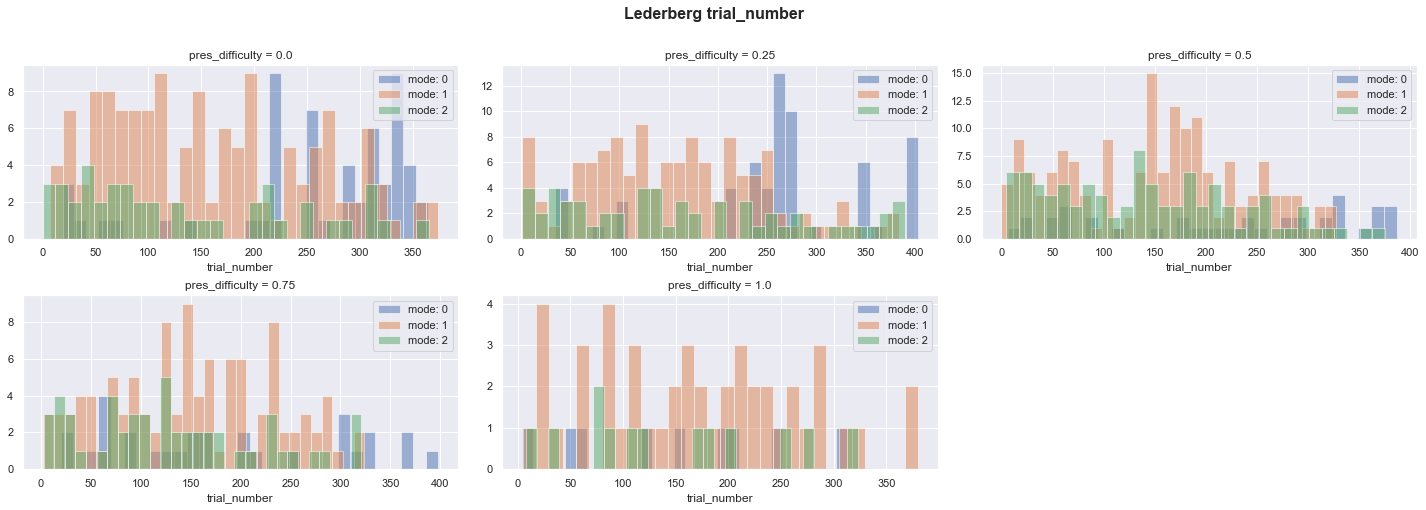

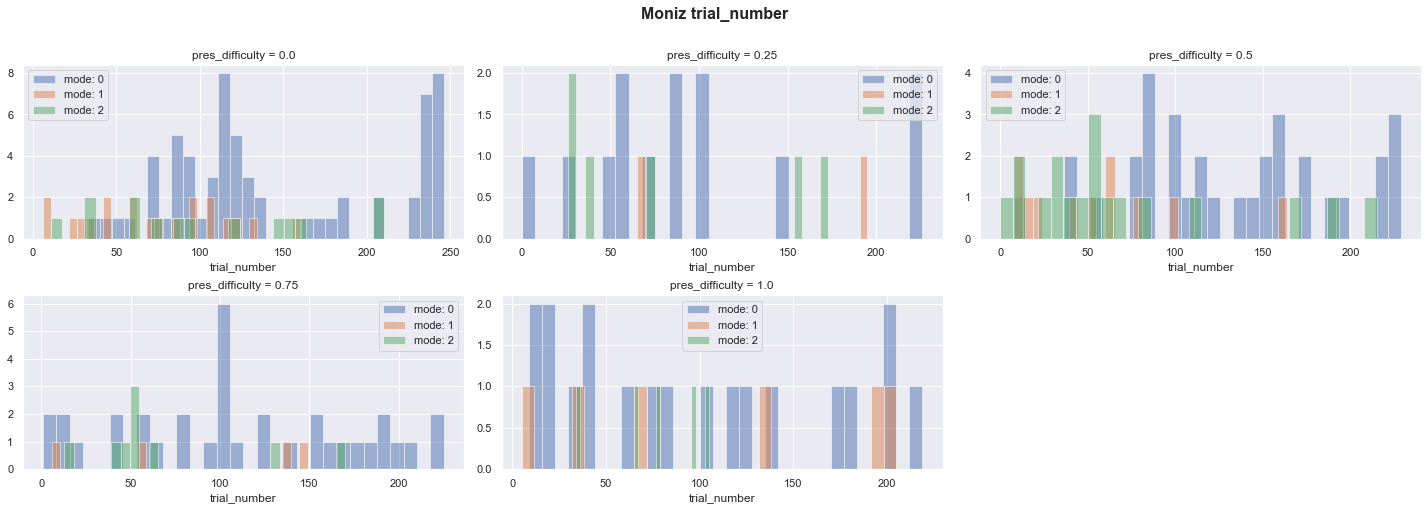

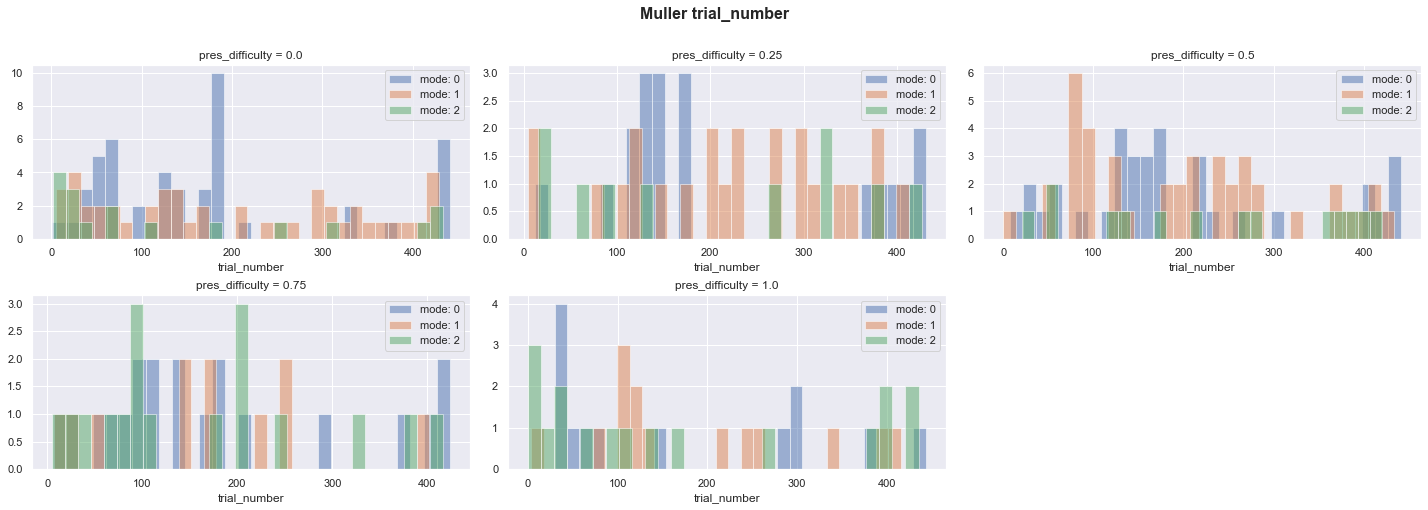

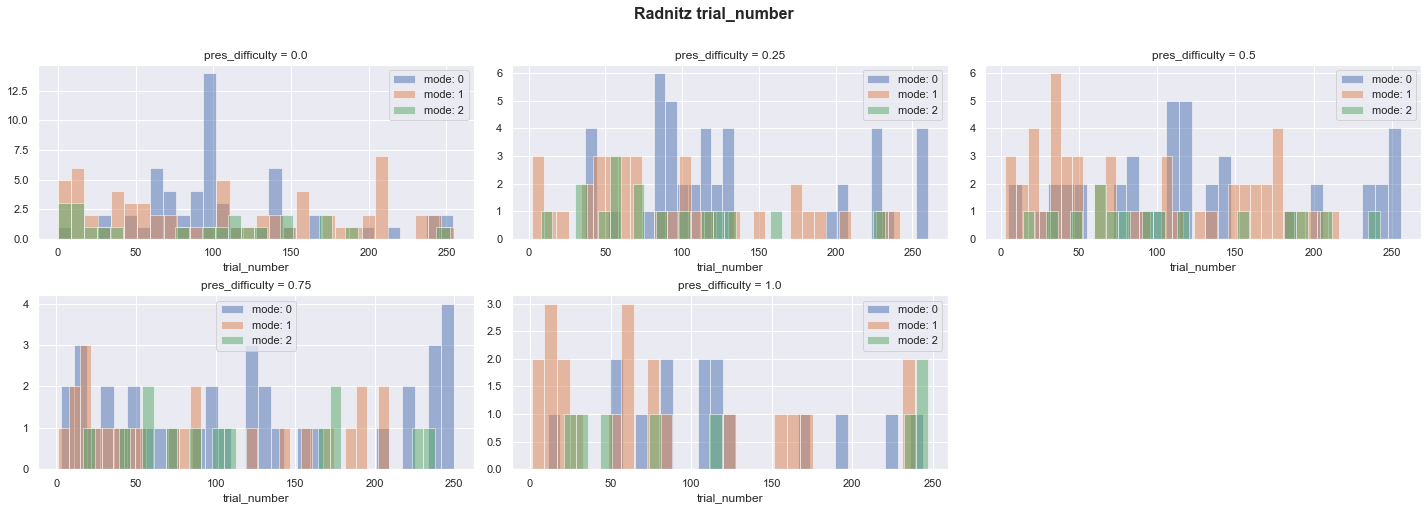

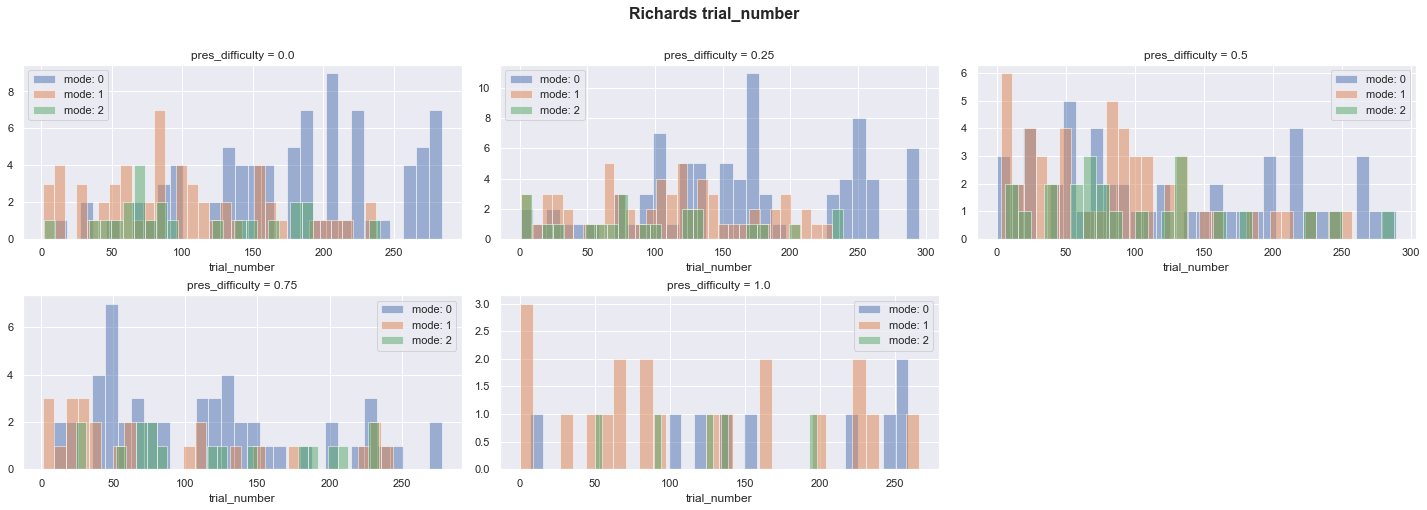

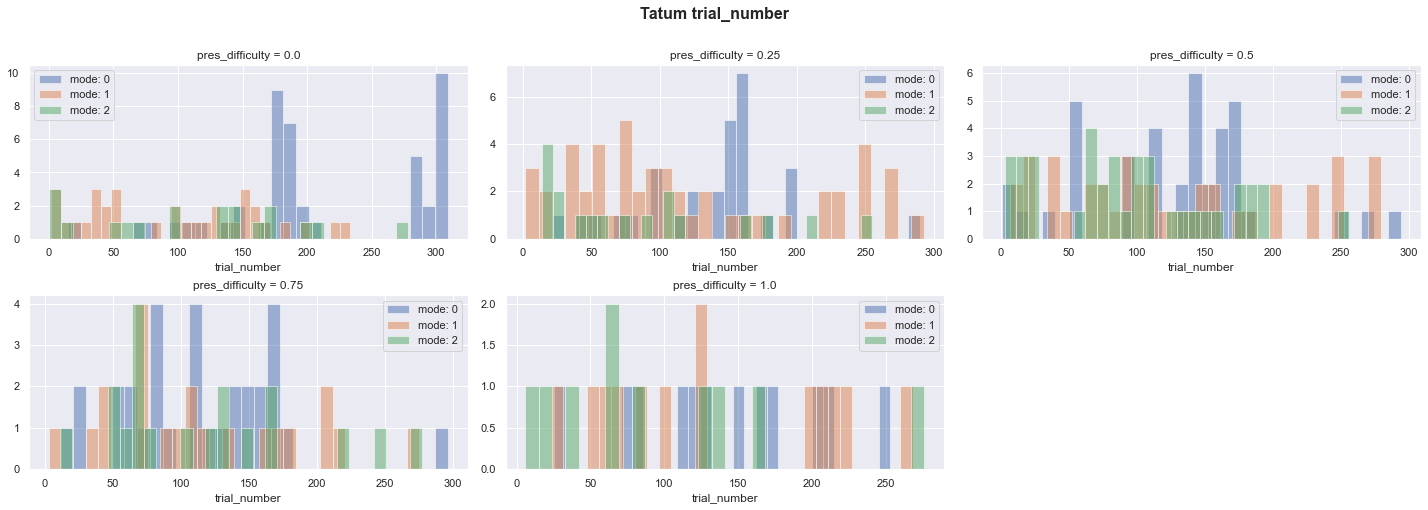

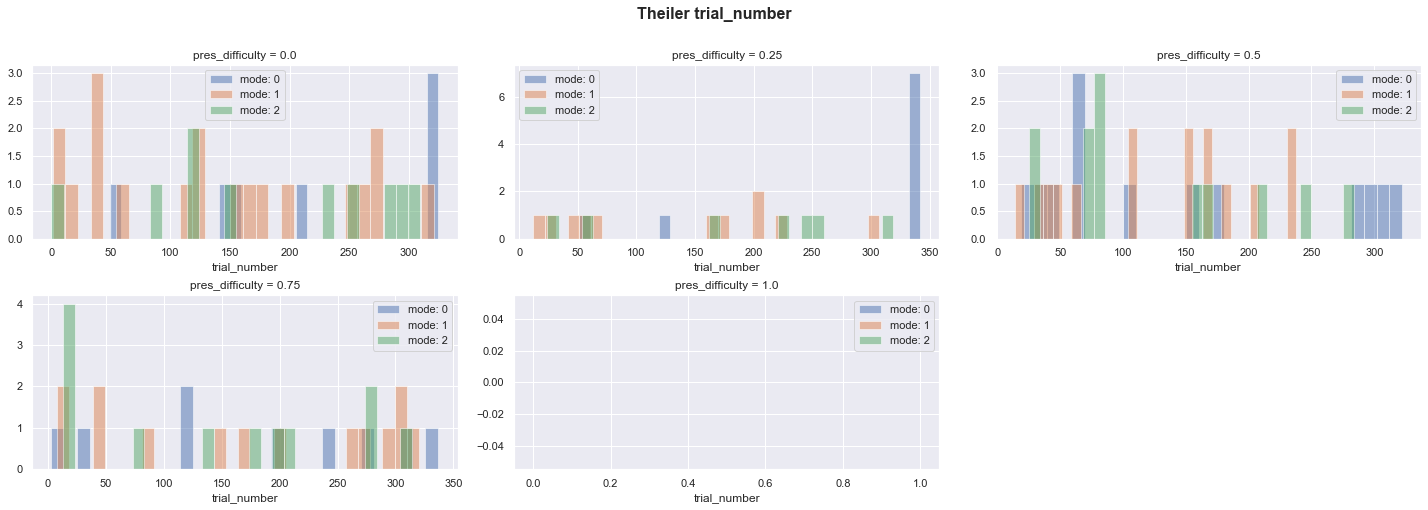

In [8]:
sns.set()
f = {"go_trial": True, "fut_go_trial": True} #,"feedback_type":1.0}
histograms(train, x="trial_number", by= "mode",filter_ = f)
histograms(train, x="trial_number", fig = "mouse_name", sub="pres_difficulty",by= "mode", filter_ = f)
# histograms(train, x="lat_chg",filter_ = f)
# histograms(train, x="lat_chg", by= "feedback_type",filter_ = f)
# histograms(train, x="lat_chg", sub="pres_difficulty",by= "feedback_type", filter_ = f)

In [9]:
train.columns

Index(['session', 'session_type', 'mouse_name', 'trial_number', 'go_trial',
       'gocue', 'response_time', 'latency', 'mouse_resp', 'wheel_velocity',
       'wheel_acceleration', 'feedback_onset', 'feedback_type',
       'contrast_left', 'contrast_right', 'contrast_diff', 'pres_difficulty',
       'pres_acc', 'delta_response_time', 'past_acc', 'past_latency',
       'past_difficulty', 'fut_go_trial', 'fut_acc', 'fut_latency',
       'fut_difficulty', 'zeros', 'gocue_vel_trial', 'gocue_acc_trial',
       'stim_vel_trial', 'stim_acc_trial', 'rt_vel_trial', 'rt_acc_trial',
       'lat_chg', 'mode'],
      dtype='object')

# Latency over Time

In [10]:
dfs = preprocess(alldat, verbose = False)
dfs, _ = train_test_split(dfs)
dfs = dfs[dfs['go_trial']].dropna(axis=0) # only go trials
dd = pd.DataFrame.from_dict(trial_lat_diff(dfs, 'latency'))

Trials with this difficulty: 

(array([  0,   1,   2,   3,   4,   5,   7,   8,  23,  25,  27,  28,  29,
        30,  31,  36,  44,  50,  52,  54,  58,  70,  76,  81,  84,  89,
        98,  99, 100, 104, 113, 132, 133, 134, 138, 139, 141, 146, 150,
       155, 156, 157, 160, 162, 164, 169, 170, 171, 173, 178, 185, 188,
       192, 194, 197, 205, 206, 208, 213, 224, 227, 229, 230, 233, 237,
       238, 239, 240, 241, 242, 244, 245, 246, 251, 259, 260, 261, 268,
       269, 274, 275, 285, 289, 290, 291, 292, 293, 294, 300, 304, 306,
       309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 325,
       326, 327, 328, 329, 330, 331, 332]),)


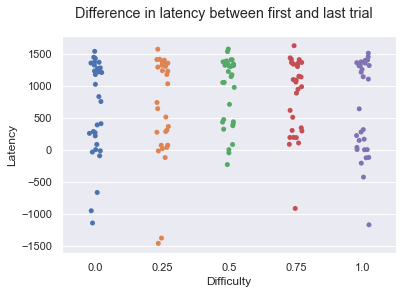

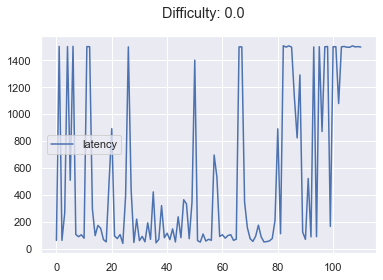

Trials with this difficulty: 

(array([ 11,  12,  20,  32,  39,  40,  41,  42,  74,  78,  79,  80,  87,
        88, 106, 112, 115, 125, 130, 135, 136, 140, 142, 148, 165, 189,
       198, 199, 218, 220, 223, 234, 236, 243, 250, 254, 255, 256, 278,
       281, 286, 287]),)


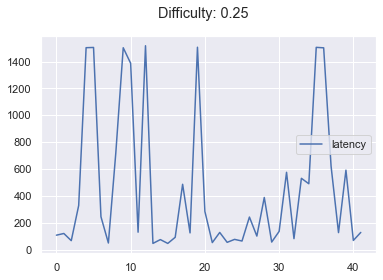

Trials with this difficulty: 

(array([ 10,  13,  14,  16,  17,  22,  24,  35,  37,  46,  49,  53,  55,
        56,  57,  61,  64,  65,  67,  69,  71,  75,  77,  85,  86,  90,
        91,  95,  96, 103, 108, 110, 116, 120, 122, 124, 126, 129, 137,
       143, 151, 152, 154, 161, 163, 167, 179, 180, 182, 195, 200, 202,
       203, 207, 210, 211, 214, 215, 219, 225, 226, 228, 232, 235, 248,
       249, 253, 258, 262, 273, 276, 277, 279, 282, 283, 295, 298, 302,
       303, 323]),)


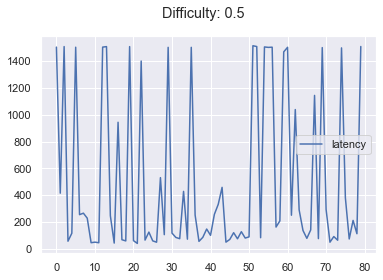

Trials with this difficulty: 

(array([  9,  15,  18,  21,  33,  43,  45,  47,  48,  51,  62,  63,  66,
        68,  73,  82,  83,  92,  93,  94,  97, 105, 107, 109, 111, 114,
       118, 127, 128, 144, 145, 147, 149, 153, 158, 159, 172, 174, 177,
       183, 184, 187, 190, 193, 196, 209, 212, 221, 231, 247, 252, 257,
       265, 266, 267, 271, 272, 284, 288, 296, 297, 301, 305, 307, 308,
       321, 322]),)


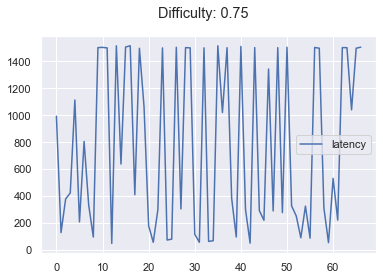

Trials with this difficulty: 

(array([  6,  19,  26,  34,  38,  59,  60,  72, 101, 102, 117, 119, 121,
       123, 131, 166, 168, 175, 176, 181, 186, 191, 201, 204, 216, 217,
       222, 263, 264, 270, 280, 299, 324]),)


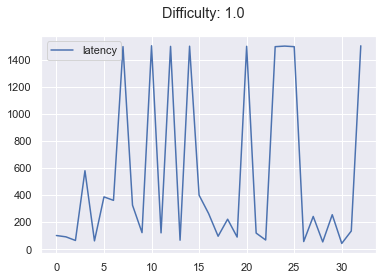

In [11]:
sns.stripplot(data=dd, jitter=True)
plt.suptitle("Difference in latency between first and last trial");
plt.xlabel("Difficulty");
plt.ylabel("Latency");

plot_over_trials(dfs[dfs['session'] == 9], ['latency'])